## Part 1. Classification on Tabular data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Here is an example with dummy data, 3 classes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/matt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/matt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/matt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/matt/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [3]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5,
                  centers=centers)

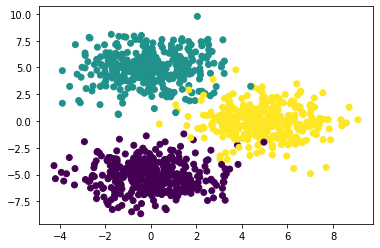

In [4]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [5]:
X[:10]

array([[-1.87936952, -7.79419188],
       [-1.43788649,  4.97714372],
       [ 0.57378964,  4.09350633],
       [ 2.45522503,  7.47920175],
       [-2.91996221, -1.93062328],
       [ 4.55001364,  0.93624965],
       [ 0.07434296, -3.90680393],
       [ 0.57553828, -4.52919858],
       [ 6.6437049 , -2.03133924],
       [-1.85836082, -3.4071208 ]])

In [6]:
y[:10]

array([0, 1, 1, 1, 0, 2, 0, 0, 2, 0])

**Question 1. Convert y to categorical data (one-hot vectors) using Keras to_categorical**

In [7]:
categorical_data = to_categorical(y)
categorical_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

**Question 2. Split data into train/test with ration 2:1 ussing Sklearn train_test_split**

In [8]:
train, test = train_test_split(categorical_data, test_size=0.33)
X_train, X_test, y_train, y_test = train_test_split(X, categorical_data, test_size=0.33, random_state=42)

Here is our model with 3 layers

In [9]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)


Epoch 1/50
670/670 [==============================] - 1s 769us/step - loss: 1.3257 - accuracy: 0.0612
Epoch 2/50
670/670 [==============================] - 0s 111us/step - loss: 1.2213 - accuracy: 0.1433
Epoch 3/50
670/670 [==============================] - 0s 94us/step - loss: 1.1318 - accuracy: 0.2731
Epoch 4/50
670/670 [==============================] - 0s 112us/step - loss: 1.0551 - accuracy: 0.3851
Epoch 5/50
670/670 [==============================] - 0s 105us/step - loss: 0.9918 - accuracy: 0.4731
Epoch 6/50
670/670 [==============================] - 0s 103us/step - loss: 0.9380 - accuracy: 0.5493
Epoch 7/50
670/670 [==============================] - 0s 91us/step - loss: 0.8886 - accuracy: 0.6761
Epoch 8/50
670/670 [==============================] - 0s 78us/step - loss: 0.8423 - accuracy: 0.7642
Epoch 9/50
670/670 [==============================] - 0s 106us/step - loss: 0.7980 - accuracy: 0.8343
Epoch 10/50
670/670 [==============================] - 0s 123us/step - loss: 0.7574 

In [11]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

330/330 [==============================] - 0s 57us/step
train_acc 0.9865671396255493
test_acc 0.9818181991577148


**Note:** If you run fit again, model will continue to train. Re-run the model block to reset model

**Question 3: Change the model architecture to see whether there is improvement**

In [12]:
print('train_acc', train_acc)
print('test_acc', test_acc)

train_acc 0.9865671396255493
test_acc 0.9818181991577148


## Titanic Dataset

**Question 6: Load Titanic dataset using pandas (file titanic.csv) and print out first 10 rows** 

In [14]:
file_path = '/home/matt/EII/DataSciences/Deep Learning/1_basic/data/titanic.csv'
titanic = pd.read_csv(file_path)
print(titanic.head(n=10))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                

**Question 7: Extract column ``survived`` as labels y , and the rest (except ``name``) as data X**

In [16]:
y = titanic['Survived']
X = titanic.loc[:, titanic.columns != 'Name']
del X['Survived']
print(y)
print(X)

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64
     Pclass     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         3    male  22.0                        1                        0   
1         1  female  38.0                        1                        0   
2         3  female  26.0                        0                        0   
3         1  female  35.0                        1                        0   
4         3    male  35.0                        0                        0   
..      ...     ...   ...                      ...                      ...   
882       2    male  27.0                        0                        0   
883       1  female  19.0                        0                        0   
884       3  female   7.0                        1                        2   
885       1    male  26.0                        0                   

**Question 8. Convert categorical data (eg. Gender) to numeric (as NN only take numeric data)**

In [17]:
X['Sex'].replace(['female','male'],[0,1],inplace=True)

# Normalize titanic datas 
X = (X - np.mean(X))/np.std(X)

X.head()

/home/matt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


**Question 9: Split train-test with ratio 2:1**

In [18]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Question 10: Adapt the above NN to train on Titanic dataset**

In [19]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

**Question 11: How to test accuracy of test data after each epoch? (hint: use validation_data)**

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

In [ ]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=64,
          validation_data=(X_train, y_train)
         )

**Question 12: Improving model by changing architecture**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

In [ ]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_data=(X_train, y_train)
         )